<a href="https://colab.research.google.com/github/fl4izdn4g/colab-training/blob/main/covid-19-seir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model SEIR w akcji
Zastosowanie modelu SEIR w praktyce

### $\frac{dS}{dt} = - \rho \beta IS $

### $\frac{dE}{dt} = \rho \beta IS - \alpha E$

### $\frac{dI}{dt} = \alpha E - \gamma I$

### $\frac{dR}{dt} = \gamma I$


gdzie:
* $ \alpha $ - $ \frac{1}{okresinkubacji} $
* $ \beta $ - współczynnik kontaktów (ile osób może zarażony zarazić) 
* $ \gamma $ - $ \frac{1}{okreszarazania} $
* $ \rho $ - współczynnik "Social distancing" <0;1>
  * 0 - lockdown
  * 1 - brak ograniczeń
 

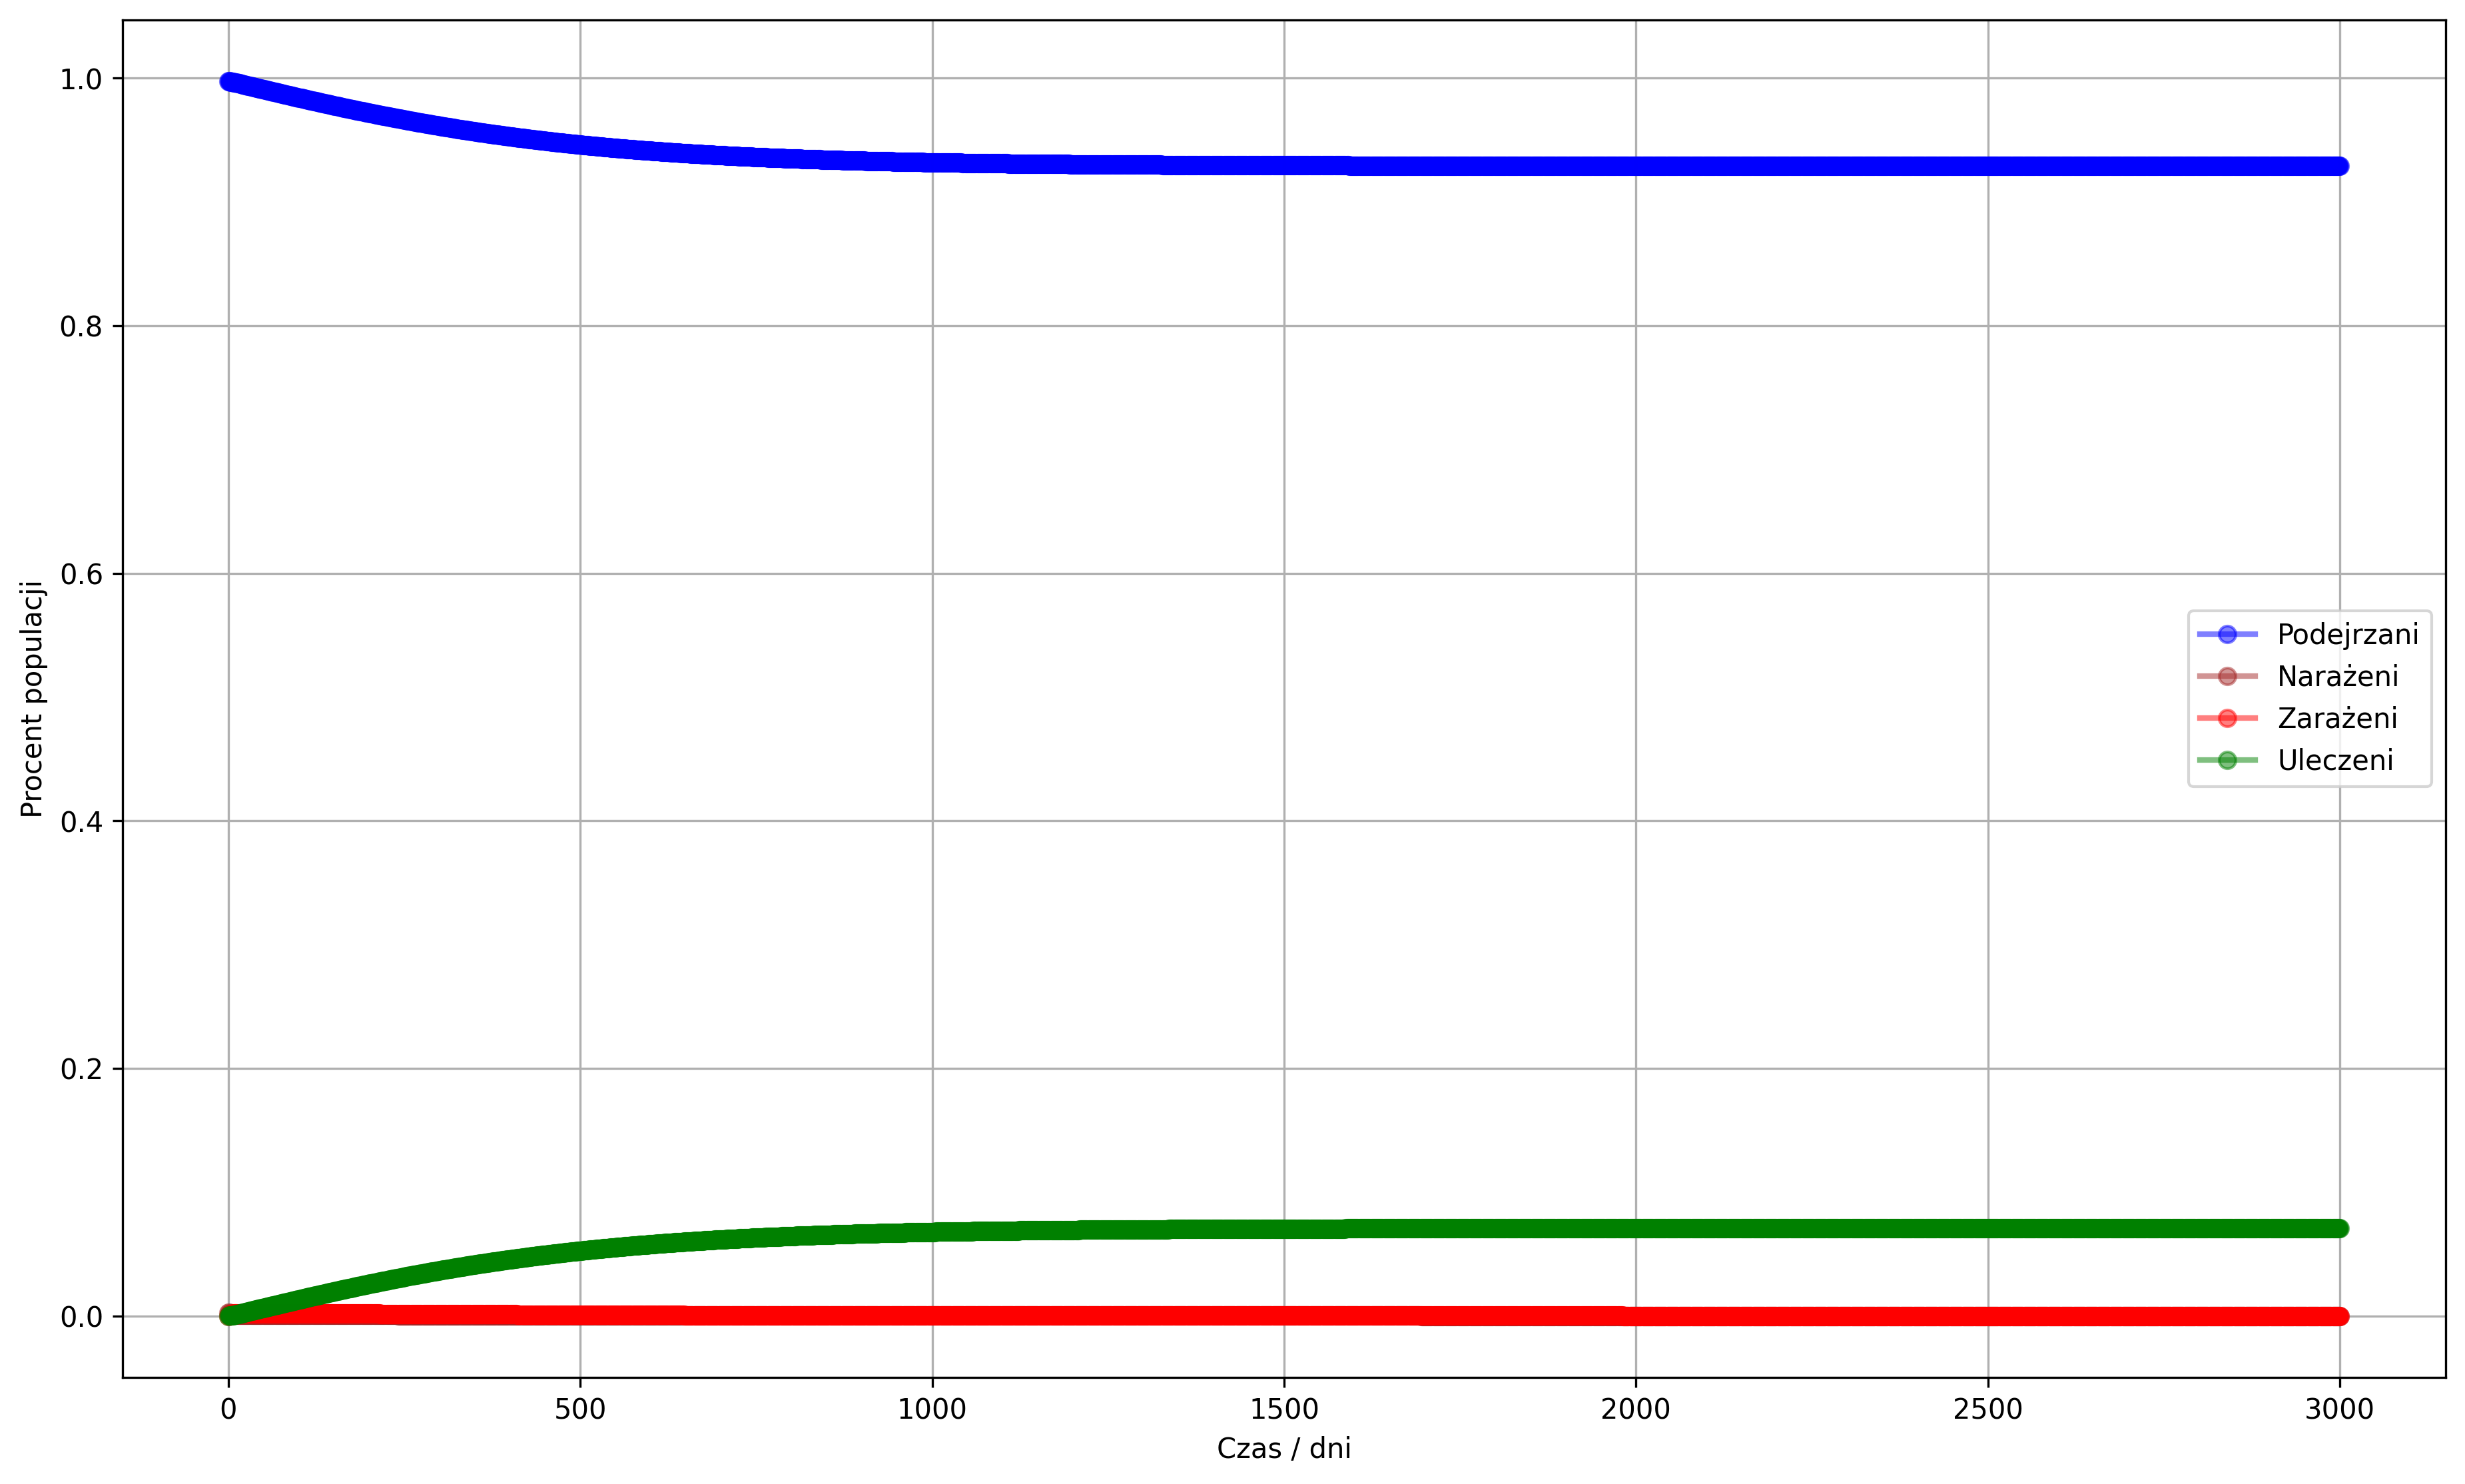

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as ss

def seir_model(y, t, alpha, beta, gamma, rho):
    S, E, I, R = y
    dSdt = -rho*beta * S * I
    dEdt = rho*beta * S * I - alpha * E
    dIdt = alpha * E  - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

#@title Parametry wejściowe

#@markdown Jak długo epidemia (dni)
total_days =3000#@param {type: "integer"}

#@markdown Populacja:
N =  380#@param {type:"integer"}

# początkowa liczba podatnych
S0 = 1 - 1./N
# początkowa liczba narażonych
E0 = 1./N
# początkowa zainfekowanych
I0 = 0
# początkowa liczba zdrowych 
R0 = 0

#@markdown Okres inkubacji
incubation_period = 5 #@param {type: "integer"}
alpha = 1./incubation_period

#@markdown Współczynnik reprodukcji wirusa
r_not =  1#@param {type: "number"}

#@markdown Social distancing
rho =  1#@param {type:"number"}

#@markdown Okres zarażania
infection_period =  14#@param {type: "integer"}
gamma = 1./(infection_period)
beta = r_not * gamma

# czas (punkty w godzinach)
t = np.linspace(0, total_days, total_days)

# wartości początkowe
y0 = S0, E0, I0, R0

# rozwiązanie układu równań.
ret = odeint(seir_model, y0, t, args=(alpha, beta, gamma, rho))
S, E, I, R = ret.T

# wykres
fig = plt.figure(facecolor='w', figsize=(15,9), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, marker='o', label='Podejrzani')
ax.plot(t, E, 'brown', alpha=0.5, lw=2, marker='o', label='Narażeni')
ax.plot(t, I, 'r', alpha=0.5, lw=2, marker='o', label='Zarażeni')
ax.plot(t, R, 'g', alpha=0.5, lw=2, marker='o', label='Uleczeni')
ax.set_xlabel('Czas / dni')
ax.set_ylabel('Procent populacji')
ax.grid()
ax.legend(loc='best')
plt.show()


